### <a name='0'></a>Import biblioteki

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns


sns.set()
np.__version__

'2.0.2'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [139]:
def fetch_financial_data(company='AMZN'):
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [140]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2025-04-11,152.90,157.67,152.82,157.14,33636239
2025-04-10,156.54,157.72,149.93,152.82,48021972
2025-04-09,144.41,159.55,143.91,158.71,70406232
2025-04-08,151.22,152.24,143.03,144.70,52200208
2025-04-07,141.55,152.85,140.53,146.75,76794136
...,...,...,...,...,...
2020-04-20,63.27,63.61,62.60,62.83,35420097
2020-04-17,63.85,64.27,63.07,63.72,51241564
2020-04-16,63.13,63.44,61.69,62.64,58105015


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [141]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2025-04-11 to 2020-04-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [142]:
pd.set_option('display.precision', 2)
google.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Open,1257.00,124.76,32.63,61.77,99.76,125.19,144.53,203.39
High,1257.00,126.21,32.88,62.27,101.47,126.32,145.99,207.05
Low,1257.00,123.41,32.34,60.03,98.91,123.57,143.38,202.81
Close,1257.00,124.83,32.60,60.39,100.21,124.97,144.91,206.38
Volume,1257.00,32278510.26,13489921.13,9346519.00,23442695.00,29109043.00,37134525.00,123645829.00


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [143]:
# tutaj wpisz rozwiązanie

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [144]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,124.76,126.21,123.41,124.83,32278510.26
std,32.63,32.88,32.34,32.60,13489921.13
min,61.77,62.27,60.03,60.39,9346519.00
25%,99.76,101.47,98.91,100.21,23442695.00
50%,125.19,126.32,123.57,124.97,29109043.00
75%,144.53,145.99,143.38,144.91,37134525.00
max,203.39,207.05,202.81,206.38,123645829.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

<Axes: xlabel='Date'>

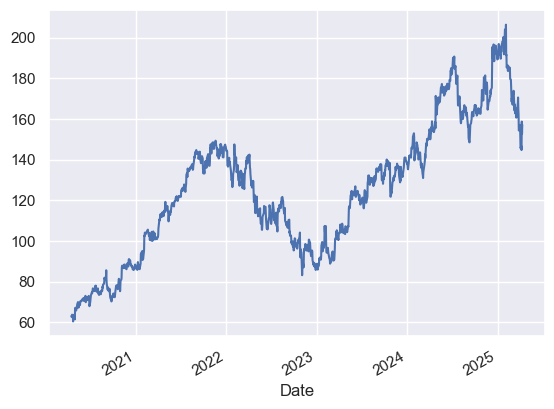

In [145]:
google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [146]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2025-04-11,152.90,157.67,152.82,157.14,33636239
1,2025-04-10,156.54,157.72,149.93,152.82,48021972
2,2025-04-09,144.41,159.55,143.91,158.71,70406232
3,2025-04-08,151.22,152.24,143.03,144.70,52200208
4,2025-04-07,141.55,152.85,140.53,146.75,76794136
...,...,...,...,...,...,...
1252,2020-04-20,63.27,63.61,62.60,62.83,35420097
1253,2020-04-17,63.85,64.27,63.07,63.72,51241564
1254,2020-04-16,63.13,63.44,61.69,62.64,58105015
1255,2020-04-15,62.10,63.53,61.48,62.64,42389952


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [147]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2025-04-11,152.90,157.67,152.82,157.14,33636239,4,2025
1,2025-04-10,156.54,157.72,149.93,152.82,48021972,4,2025
2,2025-04-09,144.41,159.55,143.91,158.71,70406232,4,2025
3,2025-04-08,151.22,152.24,143.03,144.70,52200208,4,2025
4,2025-04-07,141.55,152.85,140.53,146.75,76794136,4,2025
...,...,...,...,...,...,...,...,...
1252,2020-04-20,63.27,63.61,62.60,62.83,35420097,4,2020
1253,2020-04-17,63.85,64.27,63.07,63.72,51241564,4,2020
1254,2020-04-16,63.13,63.44,61.69,62.64,58105015,4,2020
1255,2020-04-15,62.10,63.53,61.48,62.64,42389952,4,2020


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [148]:
google.groupby('Year')['Close'].mean()

Year
2020    76.46
2021   123.78
2022   114.35
2023   118.37
2024   163.41
2025   177.57
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

<Axes: xlabel='Year'>

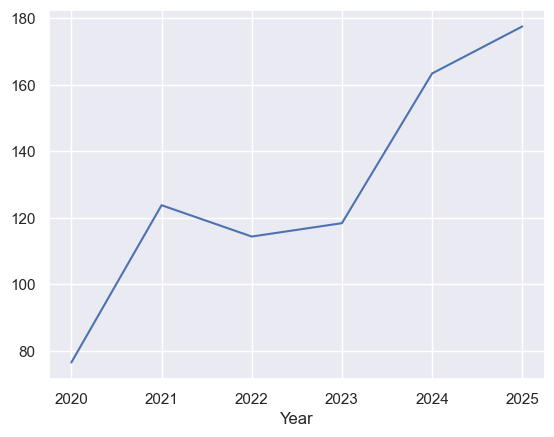

In [149]:
google.groupby('Year')['Close'].mean().plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [150]:
google.groupby('Month')['Close'].mean()

Month
1    131.84
2    132.40
3    127.26
4    120.88
5    117.72
6    119.12
7    123.92
8    125.18
9    121.68
10   123.23
11   126.52
12   129.00
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

<Axes: xlabel='Month'>

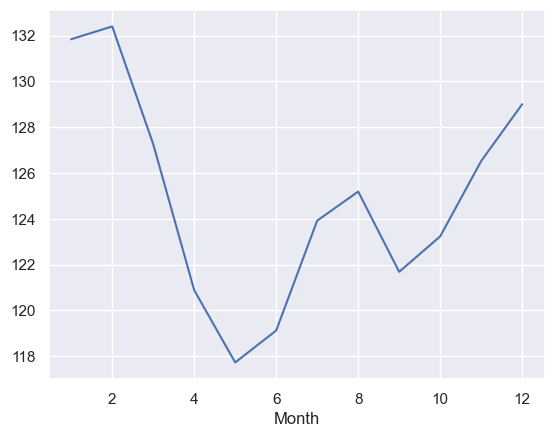

In [151]:
google.groupby('Month')['Close'].mean().plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [152]:
google.groupby(['Year','Month'])['Close'].mean()

Year  Month
2020  4        63.35
      5        68.82
      6        71.32
      7        75.49
      8        76.97
               ...  
2024  12      186.73
2025  1       195.34
      2       184.32
      3       165.36
      4       152.28
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [153]:
google['Close'].argmax()

np.int64(47)

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [154]:
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Month,Year
47,2025-02-04,203.39,207.05,202.81,206.38,43856425,2,2025


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [155]:
google[['Date','Open','Close','Volume']]

,Date,Open,Close,Volume
0,2025-04-11,152.90,157.14,33636239
1,2025-04-10,156.54,152.82,48021972
2,2025-04-09,144.41,158.71,70406232
3,2025-04-08,151.22,144.70,52200208
4,2025-04-07,141.55,146.75,76794136
...,...,...,...,...
1252,2020-04-20,63.27,62.83,35420097
1253,2020-04-17,63.85,63.72,51241564
1254,2020-04-16,63.13,62.64,58105015
1255,2020-04-15,62.10,62.64,42389952


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [156]:
google = google.set_index('Date')

In [157]:
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2025-04-11,152.90,157.67,152.82,157.14,33636239,4,2025
2025-04-10,156.54,157.72,149.93,152.82,48021972,4,2025
2025-04-09,144.41,159.55,143.91,158.71,70406232,4,2025
2025-04-08,151.22,152.24,143.03,144.70,52200208,4,2025
2025-04-07,141.55,152.85,140.53,146.75,76794136,4,2025
...,...,...,...,...,...,...,...
2020-04-20,63.27,63.61,62.60,62.83,35420097,4,2020
2020-04-17,63.85,64.27,63.07,63.72,51241564,4,2020
2020-04-16,63.13,63.44,61.69,62.64,58105015,4,2020


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [163]:
google = google.drop(columns=['Year','Month'])
google

,Open,High,Low,Close,Volume
Date,,,,,
2025-04-11,152.90,157.67,152.82,157.14,33636239
2025-04-10,156.54,157.72,149.93,152.82,48021972
2025-04-09,144.41,159.55,143.91,158.71,70406232
2025-04-08,151.22,152.24,143.03,144.70,52200208
2025-04-07,141.55,152.85,140.53,146.75,76794136
...,...,...,...,...,...
2020-04-20,63.27,63.61,62.60,62.83,35420097
2020-04-17,63.85,64.27,63.07,63.72,51241564
2020-04-16,63.13,63.44,61.69,62.64,58105015


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [164]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [165]:
google.columns = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zakniecie', 'Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zakniecie,Wolumen
Date,,,,,
2025-04-11,152.90,157.67,152.82,157.14,33636239
2025-04-10,156.54,157.72,149.93,152.82,48021972
2025-04-09,144.41,159.55,143.91,158.71,70406232
2025-04-08,151.22,152.24,143.03,144.70,52200208
2025-04-07,141.55,152.85,140.53,146.75,76794136
...,...,...,...,...,...
2020-04-20,63.27,63.61,62.60,62.83,35420097
2020-04-17,63.85,64.27,63.07,63.72,51241564
2020-04-16,63.13,63.44,61.69,62.64,58105015
